# Estimation of Hidden Markov Model


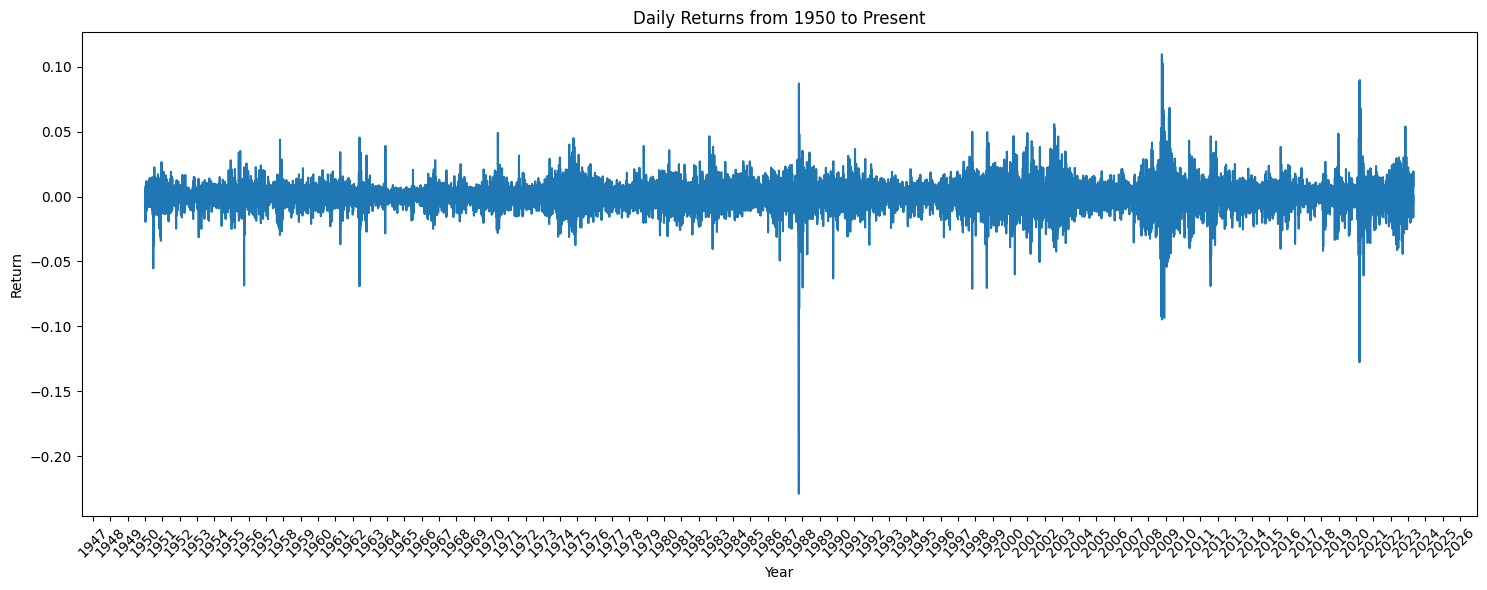

       Unnamed: 0       Date    Return
0               0 1950-01-04  0.000000
1               1 1950-01-05  0.004737
2               2 1950-01-06  0.002949
3               3 1950-01-09  0.005872
4               4 1950-01-10 -0.002932
...           ...        ...       ...
18444       18444 2023-04-24  0.000851
18445       18445 2023-04-25 -0.015937
18446       18446 2023-04-26 -0.003849
18447       18447 2023-04-27  0.019377
18448       18448 2023-04-28  0.008219

[18449 rows x 3 columns]


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
df = pd.read_csv('SP500.csv', sep=';')

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Return'])
plt.xlabel('Year')
plt.ylabel('Return')
plt.title('Daily Returns from 1950 to Present')

# Setting x-axis to show only the years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

print(df)

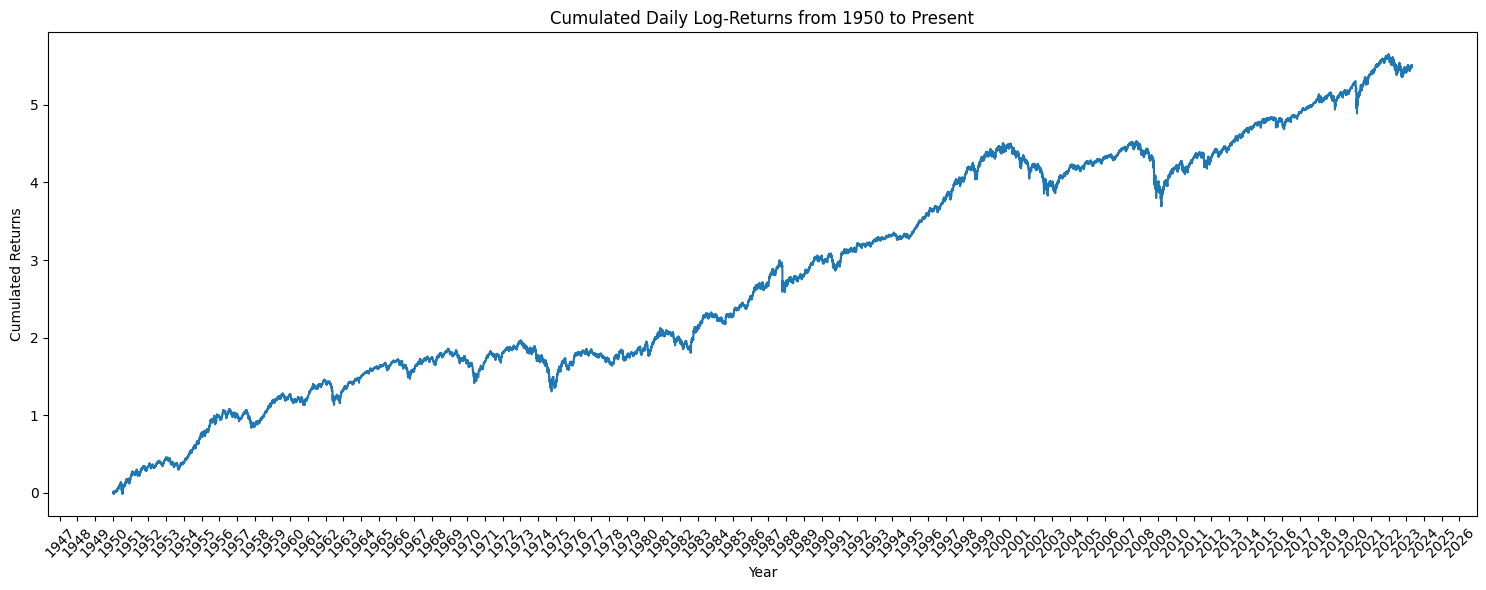

       Unnamed: 0       Date    Return  Cumulated
0               0 1950-01-04  0.000000   0.000000
1               1 1950-01-05  0.004737   0.004737
2               2 1950-01-06  0.002949   0.007686
3               3 1950-01-09  0.005872   0.013558
4               4 1950-01-10 -0.002932   0.010626
...           ...        ...       ...        ...
18444       18444 2023-04-24  0.000851   5.503385
18445       18445 2023-04-25 -0.015937   5.487448
18446       18446 2023-04-26 -0.003849   5.483599
18447       18447 2023-04-27  0.019377   5.502977
18448       18448 2023-04-28  0.008219   5.511196

[18449 rows x 4 columns]


In [61]:
df['Date'] = pd.to_datetime(df['Date'])
df['Cumulated'] = df['Return'].cumsum()
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Cumulated'])
plt.xlabel('Year')
plt.ylabel('Cumulated Returns')
plt.title('Cumulated Daily Log-Returns from 1950 to Present')

# Setting x-axis to show only the years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

print(df)

# AR, MS-AR and ARCH Estimations

In [82]:
import pandas as pd
from arch import arch_model
df['Return100'] = df['Return']*1000
print(df)
# Initialize a list to store GARCH models and their results
garch_results = []

# Fit GARCH models with different p and q lags
for p in range(1,6):
    for q in range(1,6):
        model = arch_model(df['Return100'], vol='Garch', p=p, q=q,)
        result = model.fit(disp='off')
        garch_results.append({'model': f'GARCH({p},{q})', 'result': result, 'loglik': result.loglikelihood})



       Unnamed: 0       Date    Return  Cumulated  Return100
0               0 1950-01-04  0.000000   0.000000   0.000000
1               1 1950-01-05  0.004737   0.004737   4.736539
2               2 1950-01-06  0.002949   0.007686   2.948985
3               3 1950-01-09  0.005872   0.013558   5.872007
4               4 1950-01-10 -0.002932   0.010626  -2.931635
...           ...        ...       ...        ...        ...
18444       18444 2023-04-24  0.000851   5.503385   0.851217
18445       18445 2023-04-25 -0.015937   5.487448 -15.937184
18446       18446 2023-04-26 -0.003849   5.483599  -3.848584
18447       18447 2023-04-27  0.019377   5.502977  19.377193
18448       18448 2023-04-28  0.008219   5.511196   8.219331

[18449 rows x 5 columns]


In [85]:
from scipy.stats import chi2
lr_tests = []
for i in range(len(garch_results)):
    for j in range(i + 1, len(garch_results)):
        ll_null = garch_results[i]['loglik']
        ll_alt = garch_results[j]['loglik']
        lr_stat = -2 * (ll_null - ll_alt)
        df = abs(garch_results[j]['result'].num_params - garch_results[i]['result'].num_params)
        p_value = chi2.sf(lr_stat, df)
        lr_tests.append({
            'model_1': garch_results[i]['model'],
            'model_2': garch_results[j]['model'],
            'lr_stat': lr_stat,
            'p_value': p_value
        })

# Print or inspect the lr_tests list
for i in lr_tests:
    print(i)

{'model_1': 'GARCH(1,1)', 'model_2': 'GARCH(1,2)', 'lr_stat': 12.281508592088358, 'p_value': 0.00045746842559541545}
{'model_1': 'GARCH(1,1)', 'model_2': 'GARCH(1,3)', 'lr_stat': 22.795734410436125, 'p_value': 1.1219387995443407e-05}
{'model_1': 'GARCH(1,1)', 'model_2': 'GARCH(1,4)', 'lr_stat': 23.570186218916206, 'p_value': 3.0711093770527806e-05}
{'model_1': 'GARCH(1,1)', 'model_2': 'GARCH(1,5)', 'lr_stat': 31.88771092906245, 'p_value': 2.0168973233917733e-06}
{'model_1': 'GARCH(1,1)', 'model_2': 'GARCH(2,1)', 'lr_stat': -5.1416660426184535e-05, 'p_value': 1.0}
{'model_1': 'GARCH(1,1)', 'model_2': 'GARCH(2,2)', 'lr_stat': 12.281507924271864, 'p_value': 0.0021532994998224478}
{'model_1': 'GARCH(1,1)', 'model_2': 'GARCH(2,3)', 'lr_stat': 22.795735289357253, 'p_value': 4.454178077163452e-05}
{'model_1': 'GARCH(1,1)', 'model_2': 'GARCH(2,4)', 'lr_stat': 22.900711154172313, 'p_value': 0.00013254260803239508}
{'model_1': 'GARCH(1,1)', 'model_2': 'GARCH(2,5)', 'lr_stat': 27.922003242973005,

In [86]:
# Filter and print the models where the p-value is greater than 0.05 (cannot reject at 5% significance level)
non_rejected_models = [test for test in lr_tests if test['p_value'] > 0.05]

for model in non_rejected_models:
    print(f"Model Comparison: {model['model_1']} vs {model['model_2']}")
    print(f"LR Statistic: {model['lr_stat']}, P-value: {model['p_value']}\n")


Model Comparison: GARCH(1,1) vs GARCH(2,1)
LR Statistic: -5.1416660426184535e-05, P-value: 1.0

Model Comparison: GARCH(1,1) vs GARCH(3,1)
LR Statistic: -9.673676686361432e-07, P-value: 1.0

Model Comparison: GARCH(1,1) vs GARCH(4,1)
LR Statistic: -4.866160452365875e-08, P-value: 1.0

Model Comparison: GARCH(1,1) vs GARCH(5,1)
LR Statistic: 1.1932570487260818e-08, P-value: 1.0

Model Comparison: GARCH(1,2) vs GARCH(2,2)
LR Statistic: -6.678164936602116e-07, P-value: 1.0

Model Comparison: GARCH(1,2) vs GARCH(3,1)
LR Statistic: -12.281509559456026, P-value: 1.0

Model Comparison: GARCH(1,2) vs GARCH(3,2)
LR Statistic: -1.308653736487031e-07, P-value: 1.0

Model Comparison: GARCH(1,2) vs GARCH(4,1)
LR Statistic: -12.281508640749962, P-value: 1.0

Model Comparison: GARCH(1,2) vs GARCH(4,2)
LR Statistic: -1.0849907994270325e-07, P-value: 1.0

Model Comparison: GARCH(1,2) vs GARCH(4,4)
LR Statistic: 10.619202832356677, P-value: 0.05947523867149051

Model Comparison: GARCH(1,2) vs GARCH(5,1)